In [97]:
using Plots

### Get familiar with a 2D mesh

The mesh here will represent the controls volumes (cells) that are all connected.

Make sure that:
1) $x$ varies from -2.0 to 2.0
2) $y$ varies from -2.0 to 0.0
3) number of cells in $x$ and $y$ is 21 and 11
4) compute grid spacing $\Delta x$ and $\Delta y$
5) add plot for horizontal midfaces 

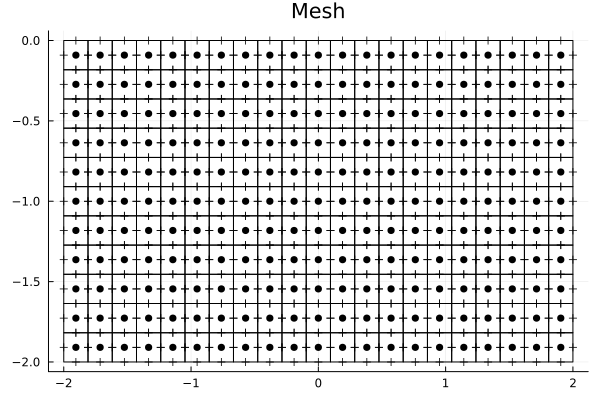

In [98]:
# Generation of a 2D domain
# xmin, xmax = ..., ...
# ymin, ymax = ..., ...
# ncx,  ncy  = ..., ...
# Δx,   Δy   = ..., ...
xc         = LinRange(xmin+Δx/2, xmax-Δx/2, ncx) 
yc         = LinRange(ymin+Δy/2, ymax-Δy/2, ncy)
xv         = LinRange(xmin, xmax, ncx+1) 
yv         = LinRange(ymin, ymax, ncy+1) 
 
# Plotting the mesh
p = plot(title="Mesh")
# Loop over all the element using a double loop
for i = 1:ncx
    for j = 1:ncy
        # 1. Plot centroids
        p = scatter!([xc[i]], [yc[j]], c=:black, label=:none)
        # 2. Plot the (connected) set of vertices
        x = [xv[i], xv[i+1], xv[i+1], xv[i]  , xv[i]]
        y = [yv[j], yv[j]  , yv[j+1], yv[j+1], yv[j]]
        p = plot!(x, y, c=:black, label=:none)
        # 3. Plot vertical midfaces
        vx = [xv[i], xv[i+1]]
        vy = [yc[j], yc[j]  ]
        p = scatter!(vx, vy, c=:black, label=:none, marker=:cross)        # 3. Plot vertical midfaces
        # 4. Plot horizontal midfaces
        # vx = ...
        # vy = ...
        # p = scatter!(..., ..., c=:black, label=:none, marker=:cross)
    end
end
display(p)

### Compressibility and incompressibility

The conervation of mass is expressed as 
$$
\frac{\partial \rho}{\partial t} + \nabla \cdot \left(\mathbf{v}\rho\right)  = 0
$$

or 

$$
\frac{\mathrm{d}\rho}{\mathrm{d} t} = - \rho \left(\nabla \cdot \mathbf{v}\right)
$$

Which further implies:
$$
\nabla \cdot \mathbf{v} = -\frac{1}{\rho}\frac{\mathrm{d}\rho}{\mathrm{d} t} 
$$
or, in 2D, 
$$
\frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y} = -\frac{1}{\rho}\frac{\mathrm{d}\rho}{\mathrm{d} t} 
$$

The 2 next code cells give you 2 different flow fields. The velocity component of velocity, $v_x$, is defined on the vertical mid-faces (i.e., horizontal bar on previous diagram) and $v_y$ on the horizontal mid-faces (i.e., vertical bars). 

*Warning*: These 2 arrays have different sizes !!!

For both cases:
1) Evaluate the divergence of the velocity field ($\frac{\partial v_x}{\partial x} + \frac{\partial v_y}{\partial y}$), use the `diff()` function
2) Compute the extrema values of the divergence
3) Deduce if the flow is compressible or incompressible 


extrema(divV) = (-1.4432899320127035e-15, 1.9984014443252818e-15)


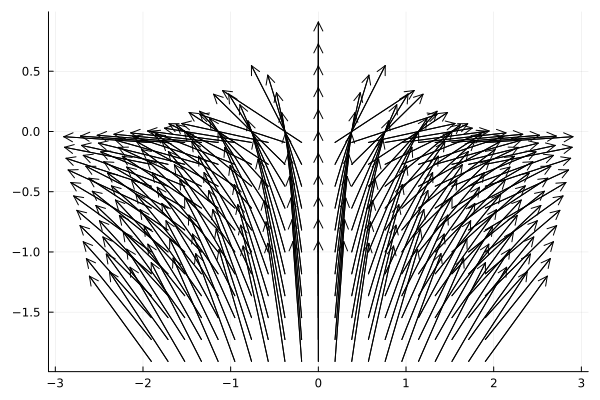

In [99]:
# The first flow field is: 
Vx =  xv .+ 0*yc'
Vy =  0*xc .- yv'

# Compute the divergence of velocity using diff() function
# divV = ...

# What are the extrema value of the divergence of v?
# prinln(...)

# Is this a compressible of incompressible flow?
# prinln(...)

# Plot the flow field
Vxc = 0.5*(Vx[1:end-1,:] .+ Vx[2:end,:]) # interpolate to centroid
Vyc = 0.5*(Vy[:,1:end-1] .+ Vy[:,2:end]) # interpolate to centroid
# Plotting the mesh
X = xc .+ 0*yc'
Y = 0*xc .+ yc'
V = sqrt.(Vxc.^2 .+ Vyc.^2)
quiver(X, Y, quiver=(Vxc./V, Vyc./V), c=:black)

extrema(divV) = (1.9999999999999978, 2.0000000000000013)


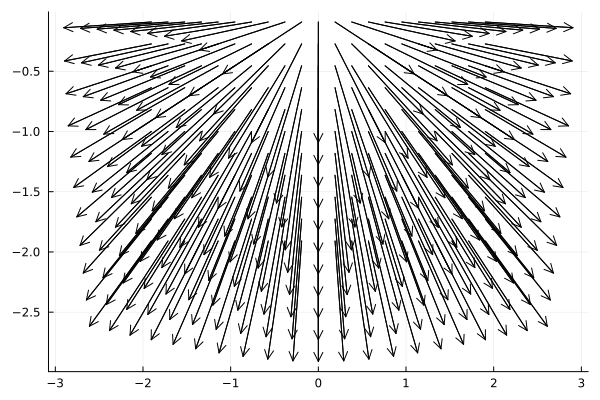

In [100]:
# The first flow field is: 
Vx =  xv .+ 0*yc'
Vy =  0*xc .+ yv'

# Compute the divergence of velocity using diff() function
# divV = ...

# What are the extrema value of the divergence of v?
# prinln(...)

# Is this a compressible of incompressible flow?
# prinln(...)

# Plot the flow field
Vxc = 0.5*(Vx[1:end-1,:] .+ Vx[2:end,:]) # interpolate to centroid
Vyc = 0.5*(Vy[:,1:end-1] .+ Vy[:,2:end]) # interpolate to centroid
# Plotting the mesh
X = xc .+ 0*yc'
Y = 0*xc .+ yc'
V = sqrt.(Vxc.^2 .+ Vyc.^2)
quiver(X, Y, quiver=(Vxc./V, Vyc./V), c=:black)